In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statistics import median
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.impute import KNNImputer    
from sklearn.cluster import KMeans  
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 100
from sklearn.metrics import mean_absolute_error as mae
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [10]:
data=pd.read_csv("train.csv")

In [11]:
data.head(20)

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
5,5,0,2,2,5,0,0,2,215,2018,10,6,1,0,0,0,212.06,0,1
6,6,2,0,0,1,2,0,0,320,2018,8,18,0,0,0,0,115.00,1,1
7,7,2,0,0,2,2,0,0,265,2018,6,24,0,0,0,0,87.00,0,0
8,8,2,0,2,3,0,0,0,189,2018,10,8,0,0,0,0,72.75,0,0
9,9,3,0,0,3,0,0,0,137,2018,12,22,1,0,0,0,117.30,2,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [13]:
data=df.astype('int')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   id                                    42100 non-null  int32
 1   no_of_adults                          42100 non-null  int32
 2   no_of_children                        42100 non-null  int32
 3   no_of_weekend_nights                  42100 non-null  int32
 4   no_of_week_nights                     42100 non-null  int32
 5   type_of_meal_plan                     42100 non-null  int32
 6   required_car_parking_space            42100 non-null  int32
 7   room_type_reserved                    42100 non-null  int32
 8   lead_time                             42100 non-null  int32
 9   arrival_year                          42100 non-null  int32
 10  arrival_month                         42100 non-null  int32
 11  arrival_date                          421

In [15]:
data['booking_status'].describe()

count   42100.00
mean        0.39
std         0.49
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         1.00
Name: booking_status, dtype: float64

In [16]:
data.describe()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00
mean,21049.50,1.92,0.14,0.88,2.40,0.24,0.03,0.43,103.89,2017.86,7.59,15.90,0.73,0.03,0.02,0.18,104.26,0.57,0.39
std,12153.37,0.52,0.45,0.89,1.43,0.59,0.16,0.83,81.07,0.35,2.83,8.89,0.63,0.17,0.33,1.73,37.11,0.78,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2017.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,10524.75,2.00,0.00,0.00,1.00,0.00,0.00,0.00,37.00,2018.00,6.00,8.00,0.00,0.00,0.00,0.00,80.00,0.00,0.00
50%,21049.50,2.00,0.00,1.00,2.00,0.00,0.00,0.00,93.00,2018.00,8.00,16.00,1.00,0.00,0.00,0.00,99.00,0.00,0.00
75%,31574.25,2.00,0.00,2.00,3.00,0.00,0.00,1.00,155.00,2018.00,10.00,24.00,1.00,0.00,0.00,0.00,123.00,1.00,1.00
max,42099.00,4.00,9.00,7.00,17.00,3.00,1.00,6.00,443.00,2018.00,12.00,31.00,4.00,1.00,13.00,58.00,540.00,5.00,1.00


In [17]:
data.isnull().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

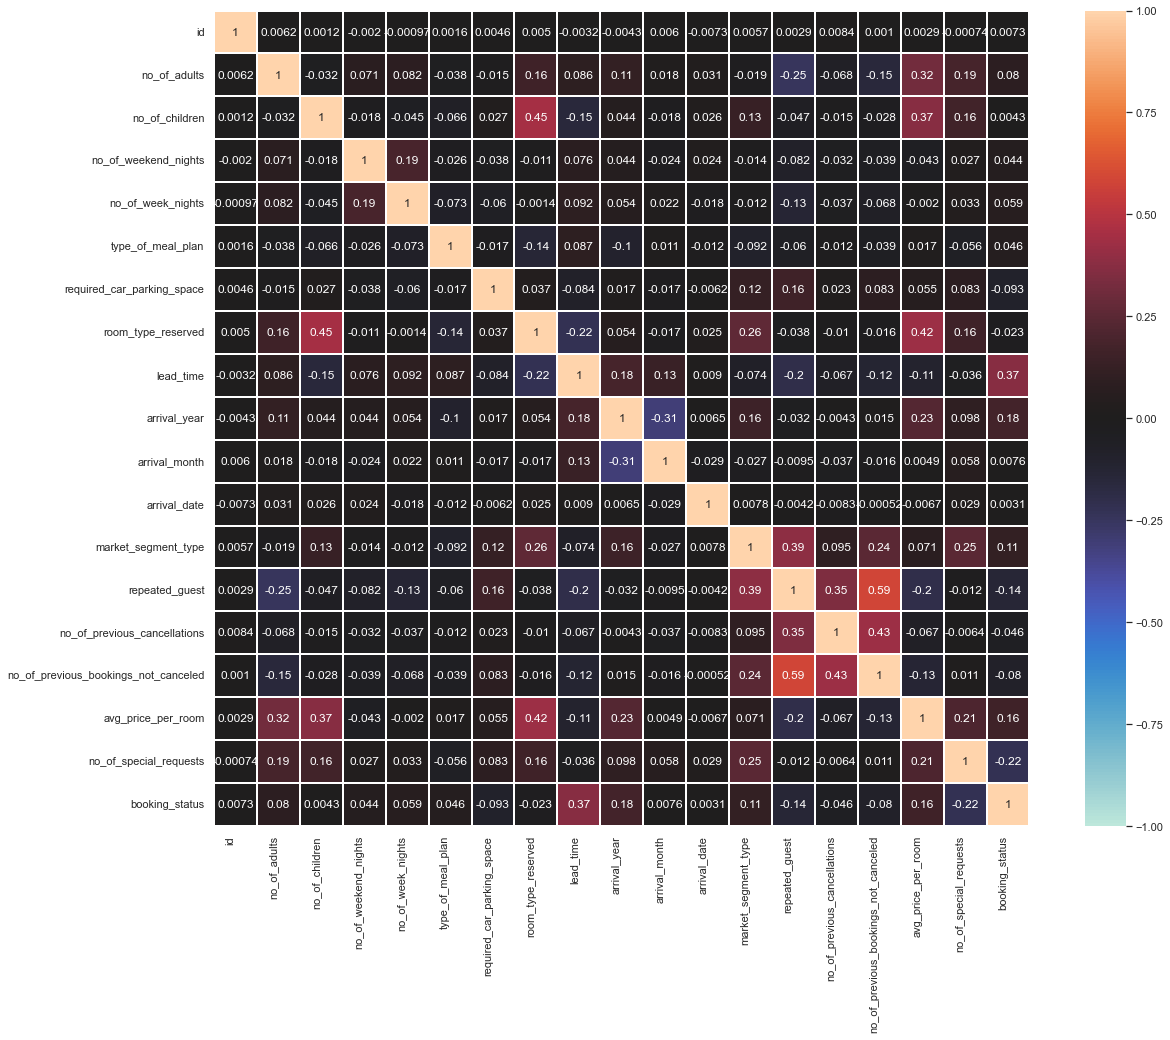

In [18]:
corr = data.corr()
sns.set(rc = {'figure.figsize':(20,15)})
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot = True,linewidths=.2
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

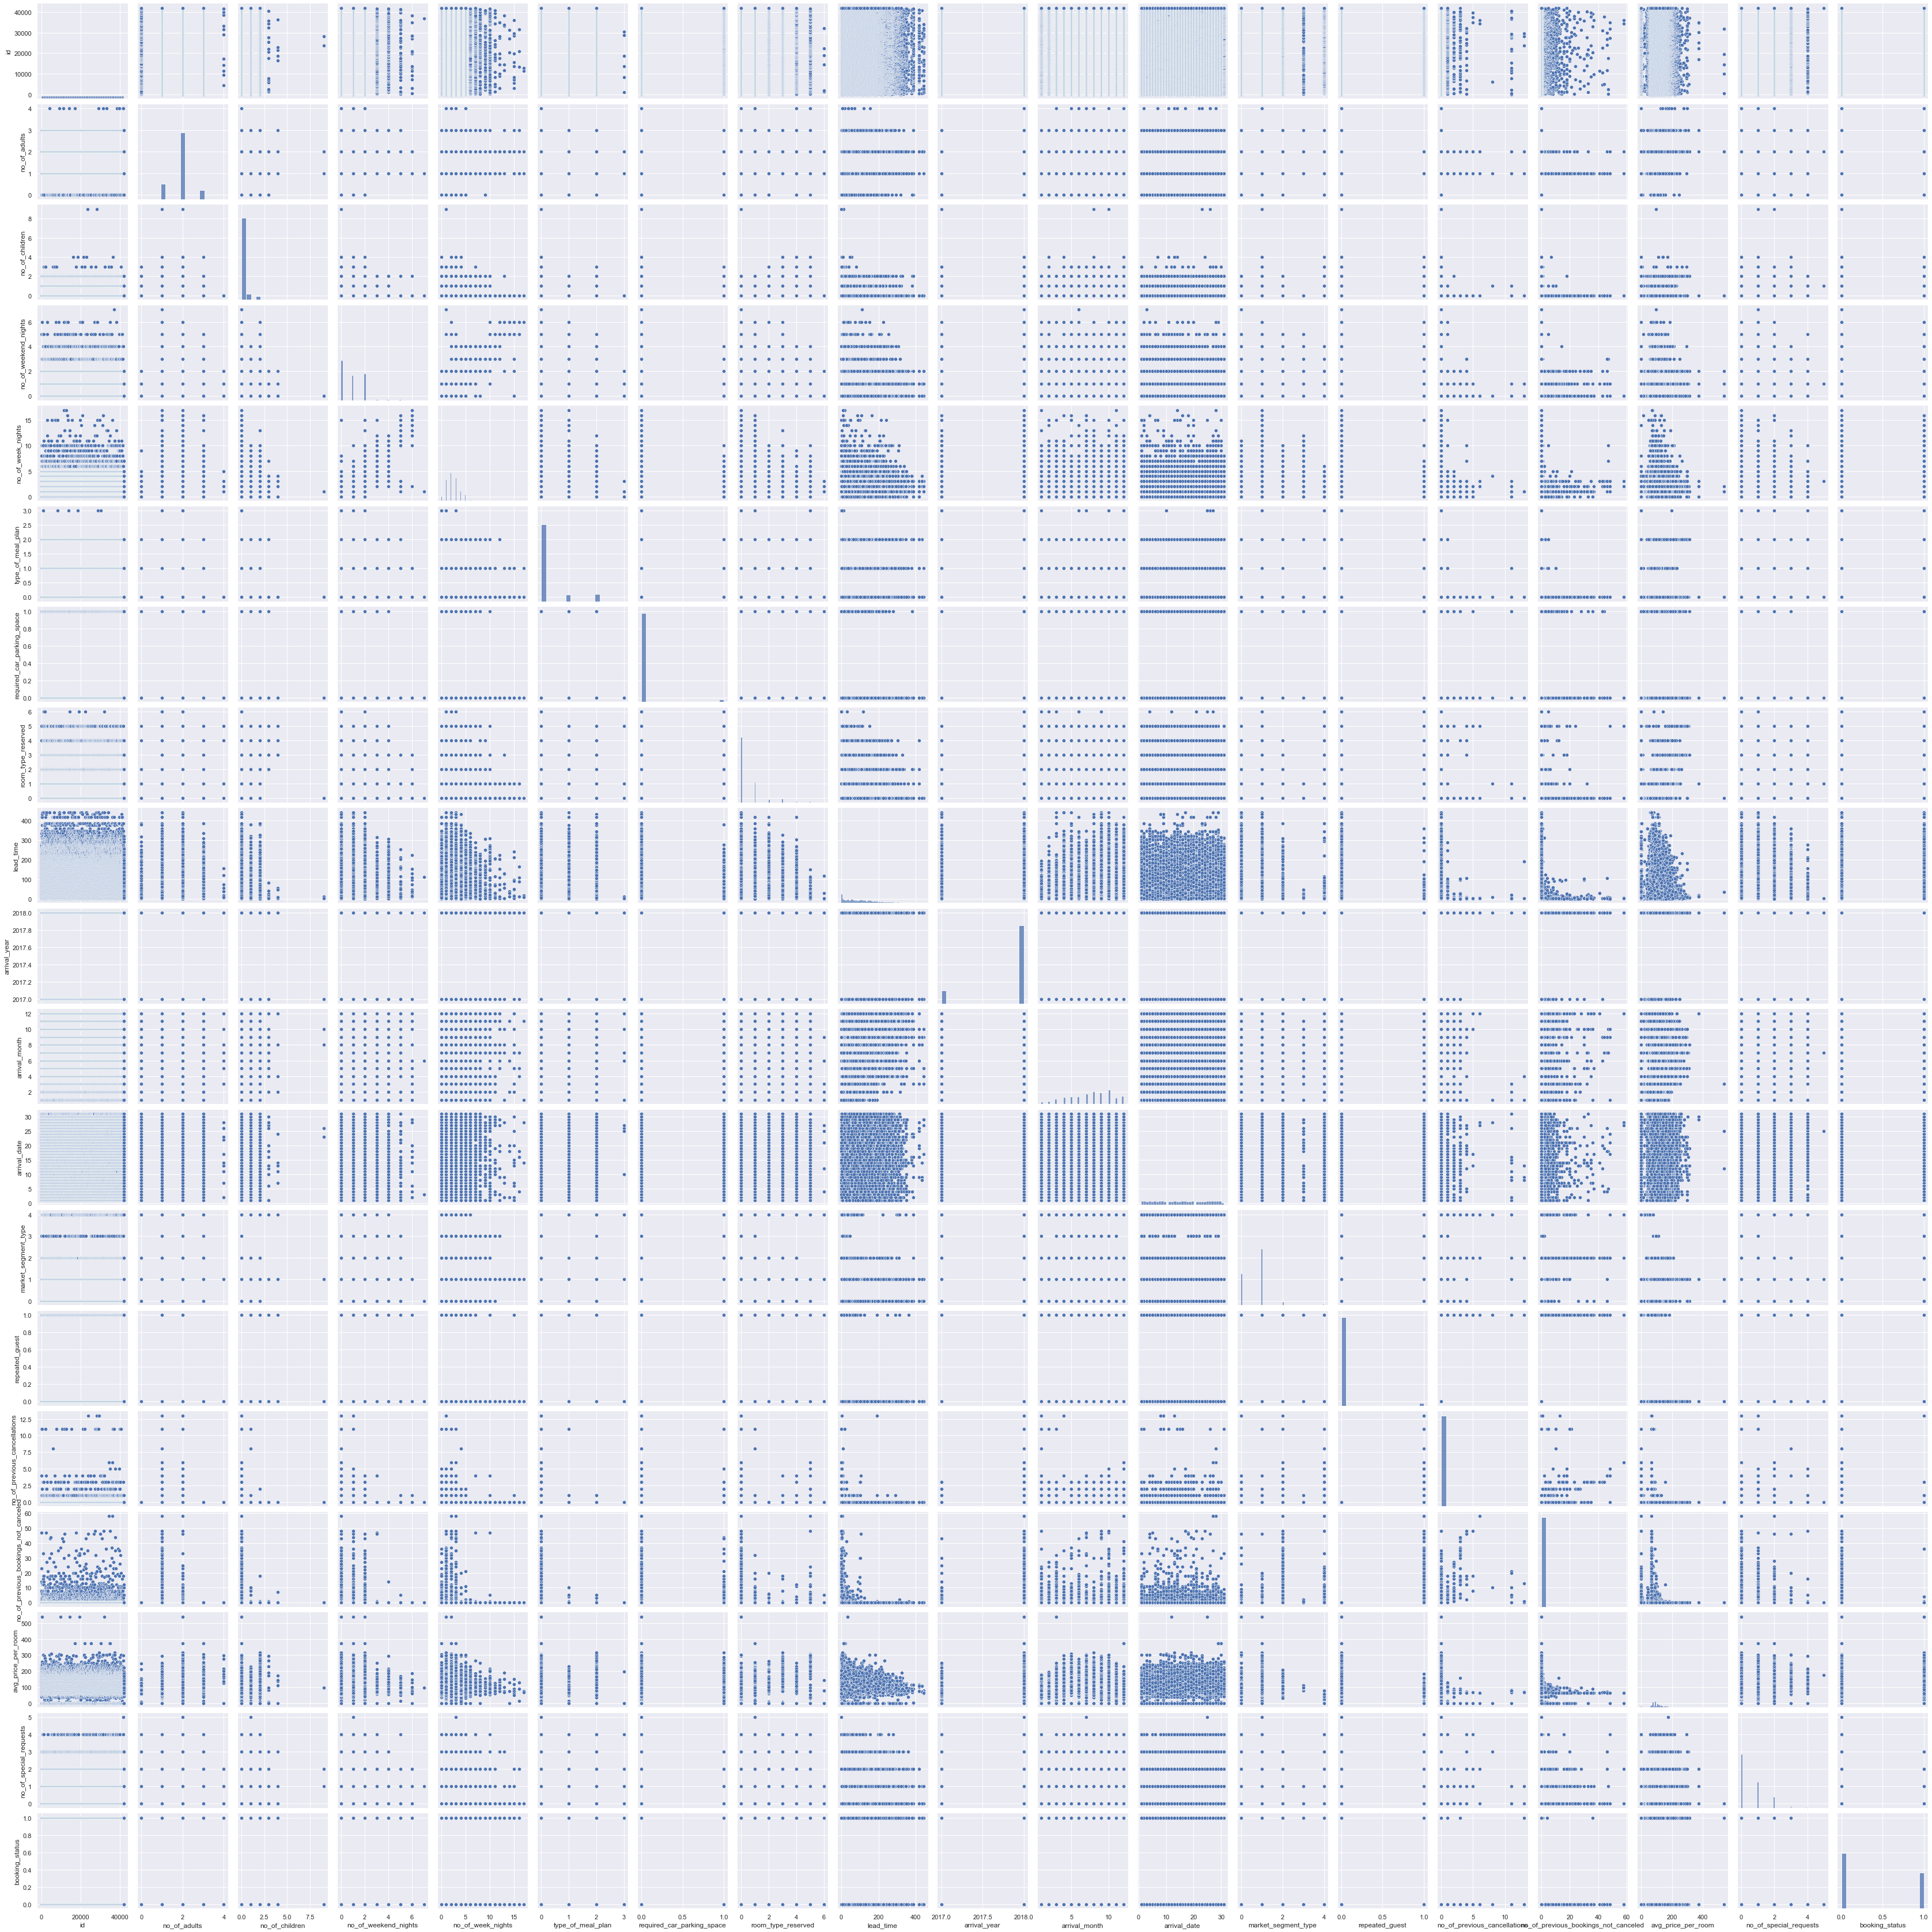

In [19]:
sns.set(rc={'figure.figsize':(15,10)})
sns.pairplot(data)

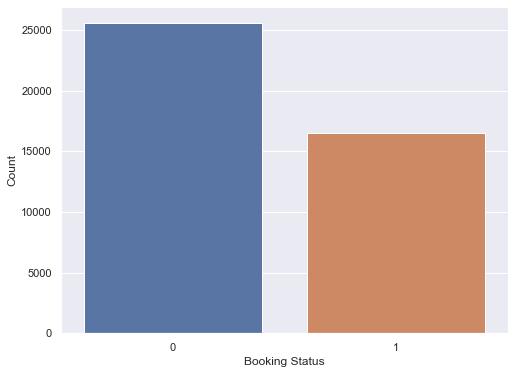

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=data['booking_status'], ax=ax)
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.show()

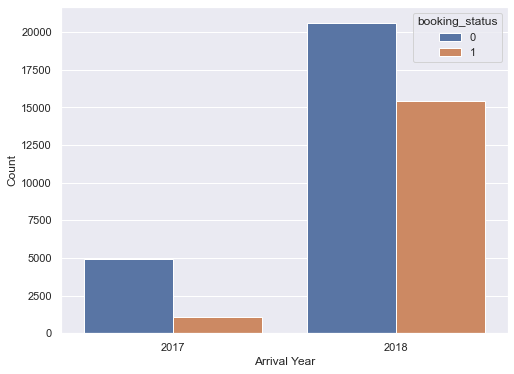

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=data['arrival_year'], hue=data['booking_status'], ax=ax)
plt.xlabel("Arrival Year")
plt.ylabel("Count")
plt.show()

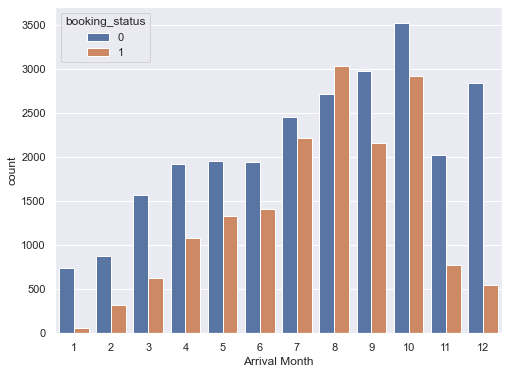

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=data['arrival_month'], hue=data['booking_status'], ax=ax)
plt.xlabel("Arrival Month")
plt.show()

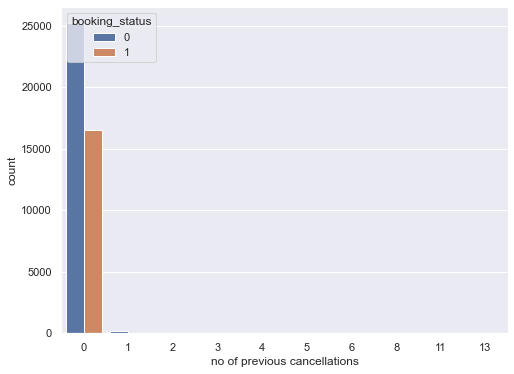

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=data['no_of_previous_cancellations'], hue=data['booking_status'], ax=ax)
plt.xlabel("no of previous cancellations")
plt.show()

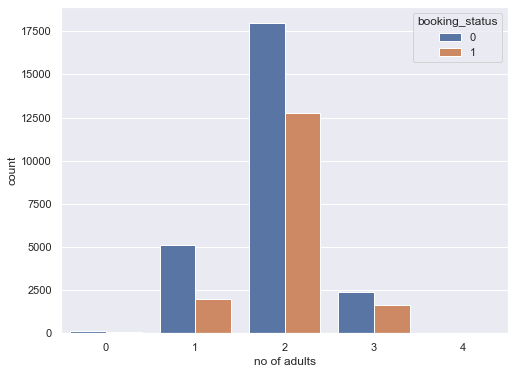

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=data['no_of_adults'], hue=data['booking_status'], ax=ax)
plt.xlabel("no of adults")
plt.show()

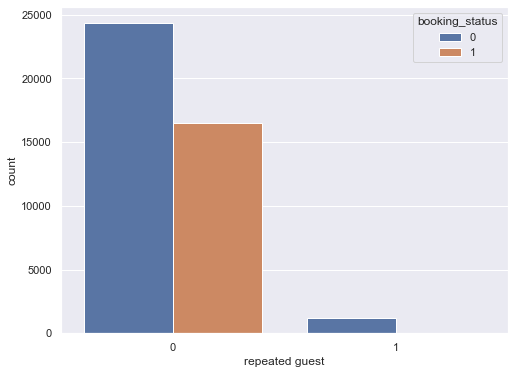

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=data['repeated_guest'], hue=data['booking_status'], ax=ax)
plt.xlabel("repeated guest")
plt.show()

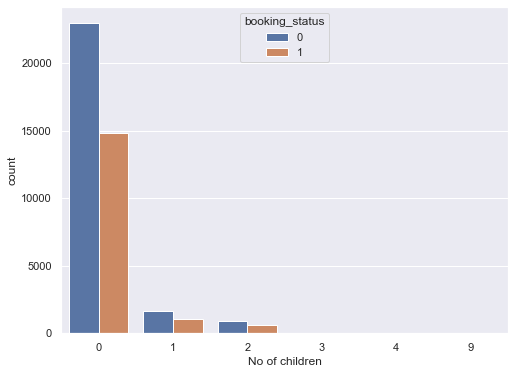

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=data['no_of_children'], hue=data['booking_status'], ax=ax)
plt.xlabel("No of children")
plt.show()

In [30]:
test_data=pd.read_csv('test.csv')

X = data.drop('booking_status',axis=1)
y = data['booking_status']

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
scaler = QuantileTransformer(output_distribution='normal')
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_valid=pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

In [9]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

 22%|██████████████████▏                                                                | 9/41 [00:05<00:27,  1.15it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 78%|████████████████████████████████████████████████████████████████                  | 32/41 [06:02<01:08,  7.61s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [07:07<00:00, 10.43s/it]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.45       0.45  0.36        0.18
HistGradientBoostingRegressor                0.45       0.45  0.36        0.64
XGBRegressor                                 0.44       0.44  0.36        2.28
RandomForestRegressor                        0.42       0.42  0.37        7.60
GradientBoostingRegressor                    0.41       0.41  0.37        2.61
MLPRegressor                                 0.38       0.38  0.38        6.32
ExtraTreesRegressor                          0.38       0.38  0.38        4.19
BaggingRegressor                             0.37       0.37  0.39        0.83
NuSVR                                        0.33       0.34  0.40       88.47
SVR                                          0.33       0.33  0.40       54.99
AdaBoostRegressor                            0.31   

In [31]:
Regression = LinearRegression()
scores = cross_val_score(Regression, X_train, y_train, cv=5)
print()
print('Two Standard Deviation (95%) Confidence Interval for Mean Accuracy')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')


Two Standard Deviation (95%) Confidence Interval for Mean Accuracy
Accuracy: 0.297 (+/- 0.022)


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 79.36%


In [34]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_valid)

mse = mean_squared_error(y_valid, y_pred)
print("Mean squared error: %.2f" % mse)
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Mean squared error: 0.18
Accuracy: 82.11%


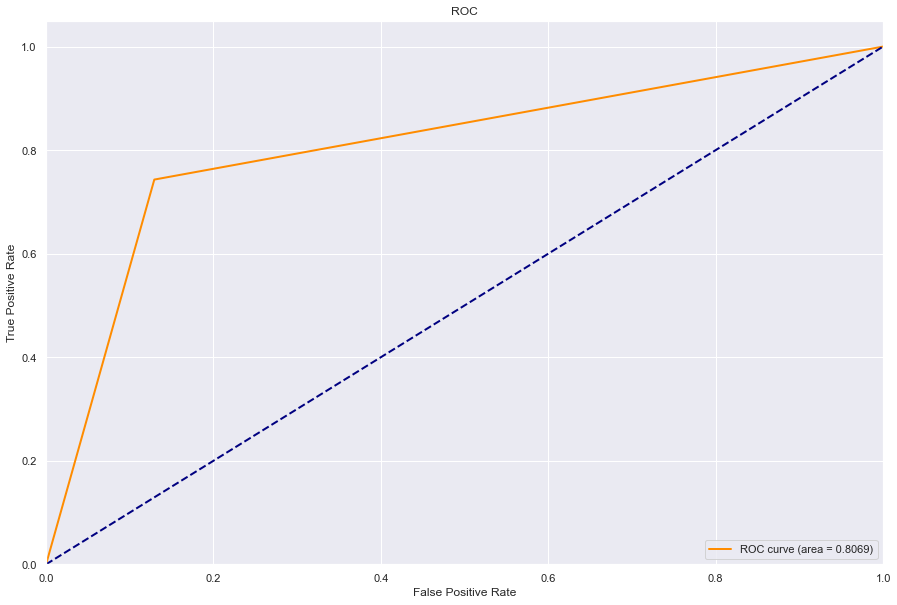

In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_valid,y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

In [36]:
from sklearn.ensemble import HistGradientBoostingClassifier
gb = HistGradientBoostingClassifier(loss='auto', learning_rate=0.1, max_iter=10000)
gb.fit(X_train, y_train)
score = gb.score(X_valid, y_valid)
mse = mean_squared_error(y_valid, y_pred)
print("Mean squared error: %.2f" % mse)

print("Accuracy: {:.2f}%".format(score * 100))

Mean squared error: 0.18
Accuracy: 82.35%


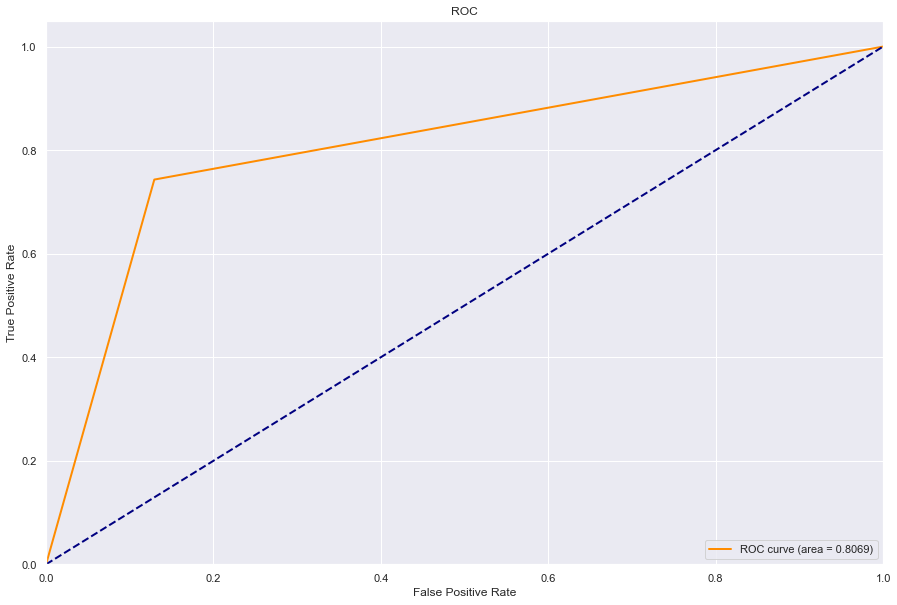

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_valid,y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

In [38]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_valid).round()
mse = mean_squared_error(y_valid, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))
r2 = r2_score(y_valid, y_pred)
print("R-squared score: {:.2f}".format(r2))
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Mean Squared Error: 0.18
R-squared score: 0.25
Accuracy: 82.13%


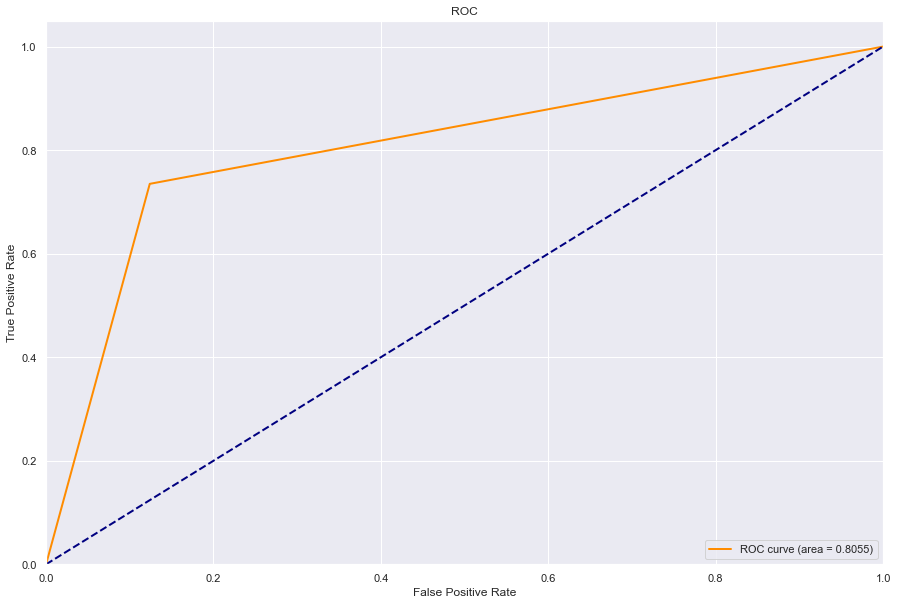

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_valid,y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

In [40]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))
r2 = r2_score(y_valid, y_pred)
print("R-squared score: {:.2f}".format(r2))
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Mean Squared Error: 0.18
R-squared score: 0.25
Accuracy: 82.23%


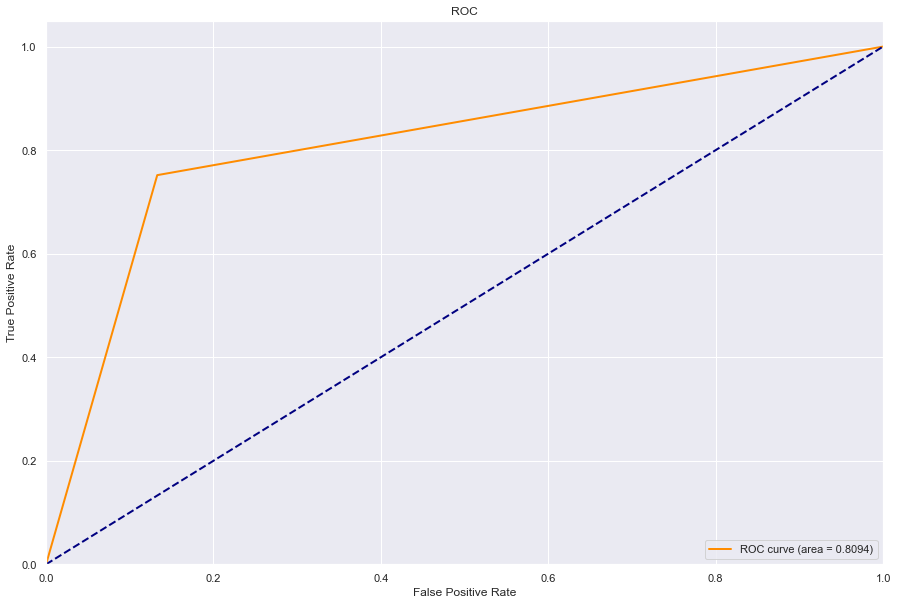

In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_valid,y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

In [42]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_valid).round()
mse = mean_squared_error(y_valid, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))
r2 = r2_score(y_valid, y_pred)
print("R-squared score: {:.2f}".format(r2))
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Mean Squared Error: 0.19
R-squared score: 0.21
Accuracy: 81.21%


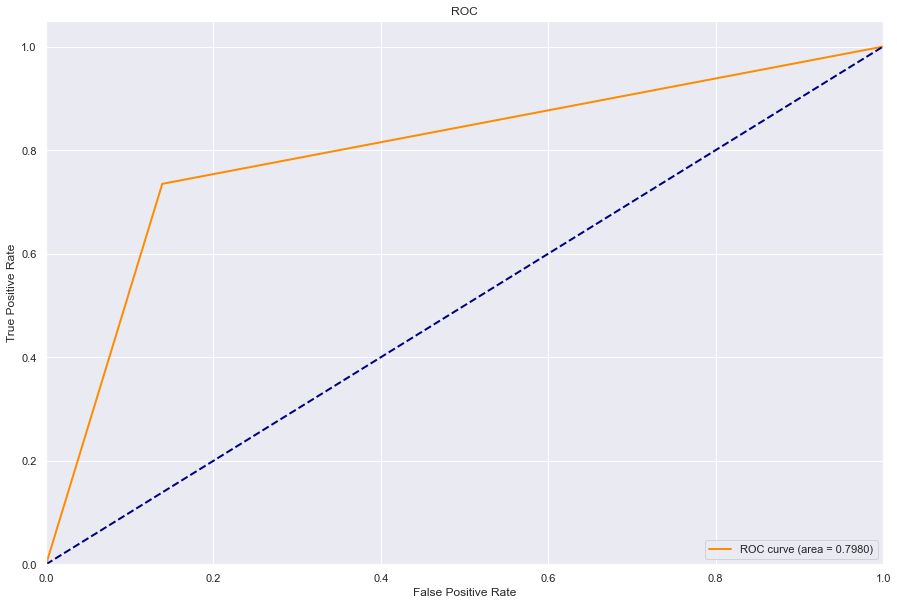

In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_valid,y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

In [45]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_valid).round()
mse = mean_squared_error(y_valid, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))
r2 = r2_score(y_valid, y_pred)
print("R-squared score: {:.2f}".format(r2))
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

<IPython.core.display.Javascript object>

Mean Squared Error: 0.19
R-squared score: 0.19
Accuracy: 80.87%


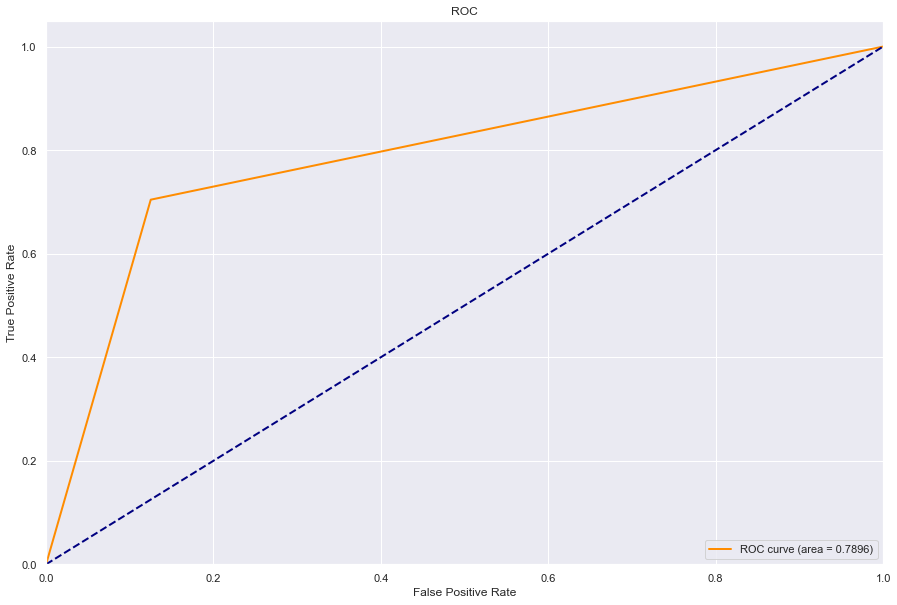

In [46]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_valid,y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

In [48]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_valid).round()
mse = mean_squared_error(y_valid, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))
r2 = r2_score(y_valid, y_pred)
print("R-squared score: {:.2f}".format(r2))
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Mean Squared Error: 0.20
R-squared score: 0.16
Accuracy: 79.98%


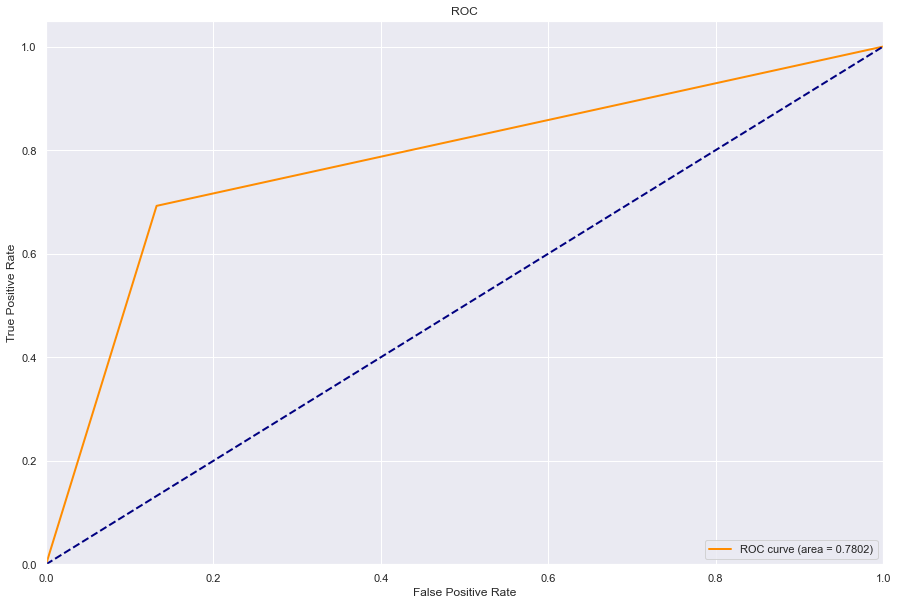

In [49]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_valid,y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

In [105]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import StratifiedKFold
data=pd.read_csv("train.csv")

In [138]:
data = pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

X = data.drop('booking_status',axis=1)
y = data['booking_status']

# Split data into train and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
scaler = QuantileTransformer(output_distribution='normal')
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_valid=pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

In [191]:
parameters = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 28,
    'learning_rate': 0.05,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.7,
#    'bagging_freq': 6,
    'verbose': -1,
    'n_estimators': 10000,
    'force_row_wise': True
}

In [197]:
skf = StratifiedKFold(n_splits=30, shuffle=True, random_state=42)

# Array to store out-of-fold predictions
oof_preds = np.zeros(X.shape[0])

for fold, (train_idx, valid_idx) in enumerate(skf.split(X, y)):
    print(f"Fold {fold+1}")
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_valid, y_valid = X.iloc[valid_idx], y.iloc[valid_idx]
    
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_valid, label=y_valid)
    
    model = lgb.train(parameters, train_data, num_boost_round=10000, 
                      valid_sets=[train_data, valid_data], 
                      early_stopping_rounds=100, verbose_eval=100)
    
    oof_preds[valid_idx] = model.predict(X_valid)

Fold 1
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.897381	valid_1's auc: 0.891271
[200]	training's auc: 0.908266	valid_1's auc: 0.896704
[300]	training's auc: 0.916029	valid_1's auc: 0.897963
[400]	training's auc: 0.922517	valid_1's auc: 0.898838
[500]	training's auc: 0.927885	valid_1's auc: 0.899608
[600]	training's auc: 0.932884	valid_1's auc: 0.899868
[700]	training's auc: 0.93718	valid_1's auc: 0.900643
[800]	training's auc: 0.941227	valid_1's auc: 0.900988
[900]	training's auc: 0.94484	valid_1's auc: 0.901699
[1000]	training's auc: 0.948154	valid_1's auc: 0.902033
Early stopping, best iteration is:
[982]	training's auc: 0.947495	valid_1's auc: 0.902291
Fold 2
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.897416	valid_1's auc: 0.88626
[200]	training's auc: 0.908264	valid_1's auc: 0.891528
[300]	training's auc: 0.916095	valid_1's auc: 0.893019
[400]	training's auc: 0.92256	valid_1's auc: 0.894824
[500]

[200]	training's auc: 0.90838	valid_1's auc: 0.895475
[300]	training's auc: 0.916057	valid_1's auc: 0.897515
[400]	training's auc: 0.922227	valid_1's auc: 0.897979
[500]	training's auc: 0.927631	valid_1's auc: 0.898559
[600]	training's auc: 0.932387	valid_1's auc: 0.898367
Early stopping, best iteration is:
[511]	training's auc: 0.928192	valid_1's auc: 0.898676
Fold 15
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.897929	valid_1's auc: 0.867675
[200]	training's auc: 0.908911	valid_1's auc: 0.873841
[300]	training's auc: 0.916481	valid_1's auc: 0.875293
[400]	training's auc: 0.9229	valid_1's auc: 0.876061
[500]	training's auc: 0.927973	valid_1's auc: 0.876822
[600]	training's auc: 0.932658	valid_1's auc: 0.877037
[700]	training's auc: 0.937076	valid_1's auc: 0.877421
Early stopping, best iteration is:
[676]	training's auc: 0.935963	valid_1's auc: 0.877647
Fold 16
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0

[100]	training's auc: 0.897116	valid_1's auc: 0.894477
[200]	training's auc: 0.908005	valid_1's auc: 0.899615
[300]	training's auc: 0.915933	valid_1's auc: 0.900651
Early stopping, best iteration is:
[290]	training's auc: 0.915221	valid_1's auc: 0.900839
Fold 30
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.897304	valid_1's auc: 0.885033
[200]	training's auc: 0.907989	valid_1's auc: 0.891616
[300]	training's auc: 0.915735	valid_1's auc: 0.893948
[400]	training's auc: 0.922333	valid_1's auc: 0.895445
[500]	training's auc: 0.927845	valid_1's auc: 0.896472
[600]	training's auc: 0.932458	valid_1's auc: 0.896907
[700]	training's auc: 0.936796	valid_1's auc: 0.897495
[800]	training's auc: 0.940881	valid_1's auc: 0.89721
Early stopping, best iteration is:
[713]	training's auc: 0.937392	valid_1's auc: 0.89773


In [198]:
# overall out-of-fold AUC score
oof_auc = roc_auc_score(y, oof_preds)
print(f"Out-of-fold AUC: {oof_auc:.4f}")

Out-of-fold AUC: 0.9002


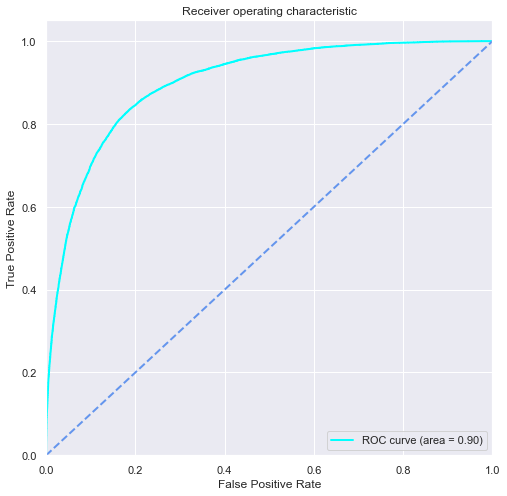

In [199]:
fpr, tpr, _ = roc_curve(y, oof_preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color="aqua", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="cornflowerblue", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [200]:
from sklearn.metrics import accuracy_score, roc_curve, auc, mean_squared_error, r2_score
accuracies = []
accuracy = accuracy_score(y_valid, oof_preds[valid_idx].round())
accuracies.append(accuracy)
mean_accuracy = sum(accuracies) / len(accuracies)
print('Mean accuracy:', mean_accuracy)
rmse_score = mean_squared_error(y_valid, oof_preds[valid_idx], squared=False)
print(rmse_score)

Mean accuracy: 0.827512473271561
0.3528643918350693


In [201]:
test_data_prediction=model.predict(test_data)
pd.DataFrame(test_data_prediction).to_csv('C:/Users/Nihal Jayan/Desktop/BACapstone/Part2/model_submission_final_3.csv')

In [96]:
#param_grid = {
#    'num_leaves': [15, 31, 63],
#    'learning_rate': [0.01, 0.05, 0.1],
#    'feature_fraction': [0.6, 0.8, 0.9],
#    'bagging_fraction': [0.6, 0.8, 0.9],
#    'bagging_freq': [6,8,9]
#}

In [97]:
#lgb_model = lgb.LGBMClassifier(**parameters)

In [98]:
# Define k-fold cross-validation with stratification
#skf = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

In [99]:
#grid = GridSearchCV(lgb_model, param_grid=param_grid, cv=skf, scoring='roc_auc', n_jobs=-1)
#grid.fit(X, y)

In [100]:
#print("Best parameters found: ", grid.best_params_)

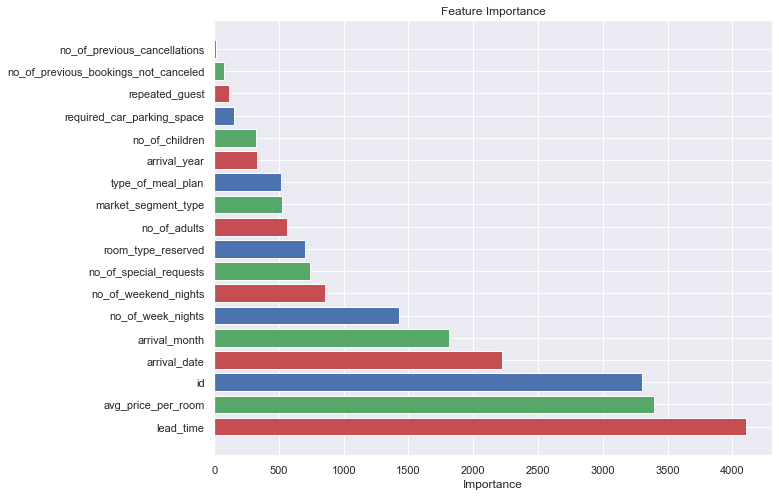

Feature Importance:
                   Feature  Importance
8                lead_time        4101
16      avg_price_per_room        3397
0                       id        3305
11            arrival_date        2224
10           arrival_month        1815
4        no_of_week_nights        1428
3     no_of_weekend_nights         853
17  no_of_special_requests         738
7       room_type_reserved         704
1             no_of_adults         563


In [60]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importance()})
feature_importance = feature_importance.sort_values(by=['Importance'], ascending=False)

plt.figure(figsize=(10, 8))
plt.title("Feature Importance")
plt.barh(range(len(feature_importance)), feature_importance['Importance'], color=['r','g', 'b'], align='center')
plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
plt.xlabel('Importance')
plt.show()

# Print the top 10 features
print("Feature Importance:")
print(feature_importance.head(10))
